In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

from sklearn import tree

In [2]:
train = pd.read_csv('/home/qwerty/ML_projects/data/train.csv')
test = pd.read_csv('/home/qwerty/ML_projects/data/test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
y = train.Survived

In [8]:
X = pd.get_dummies(X)

In [9]:
X = X.fillna({'Age': X.Age.median()})

In [10]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=100)

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

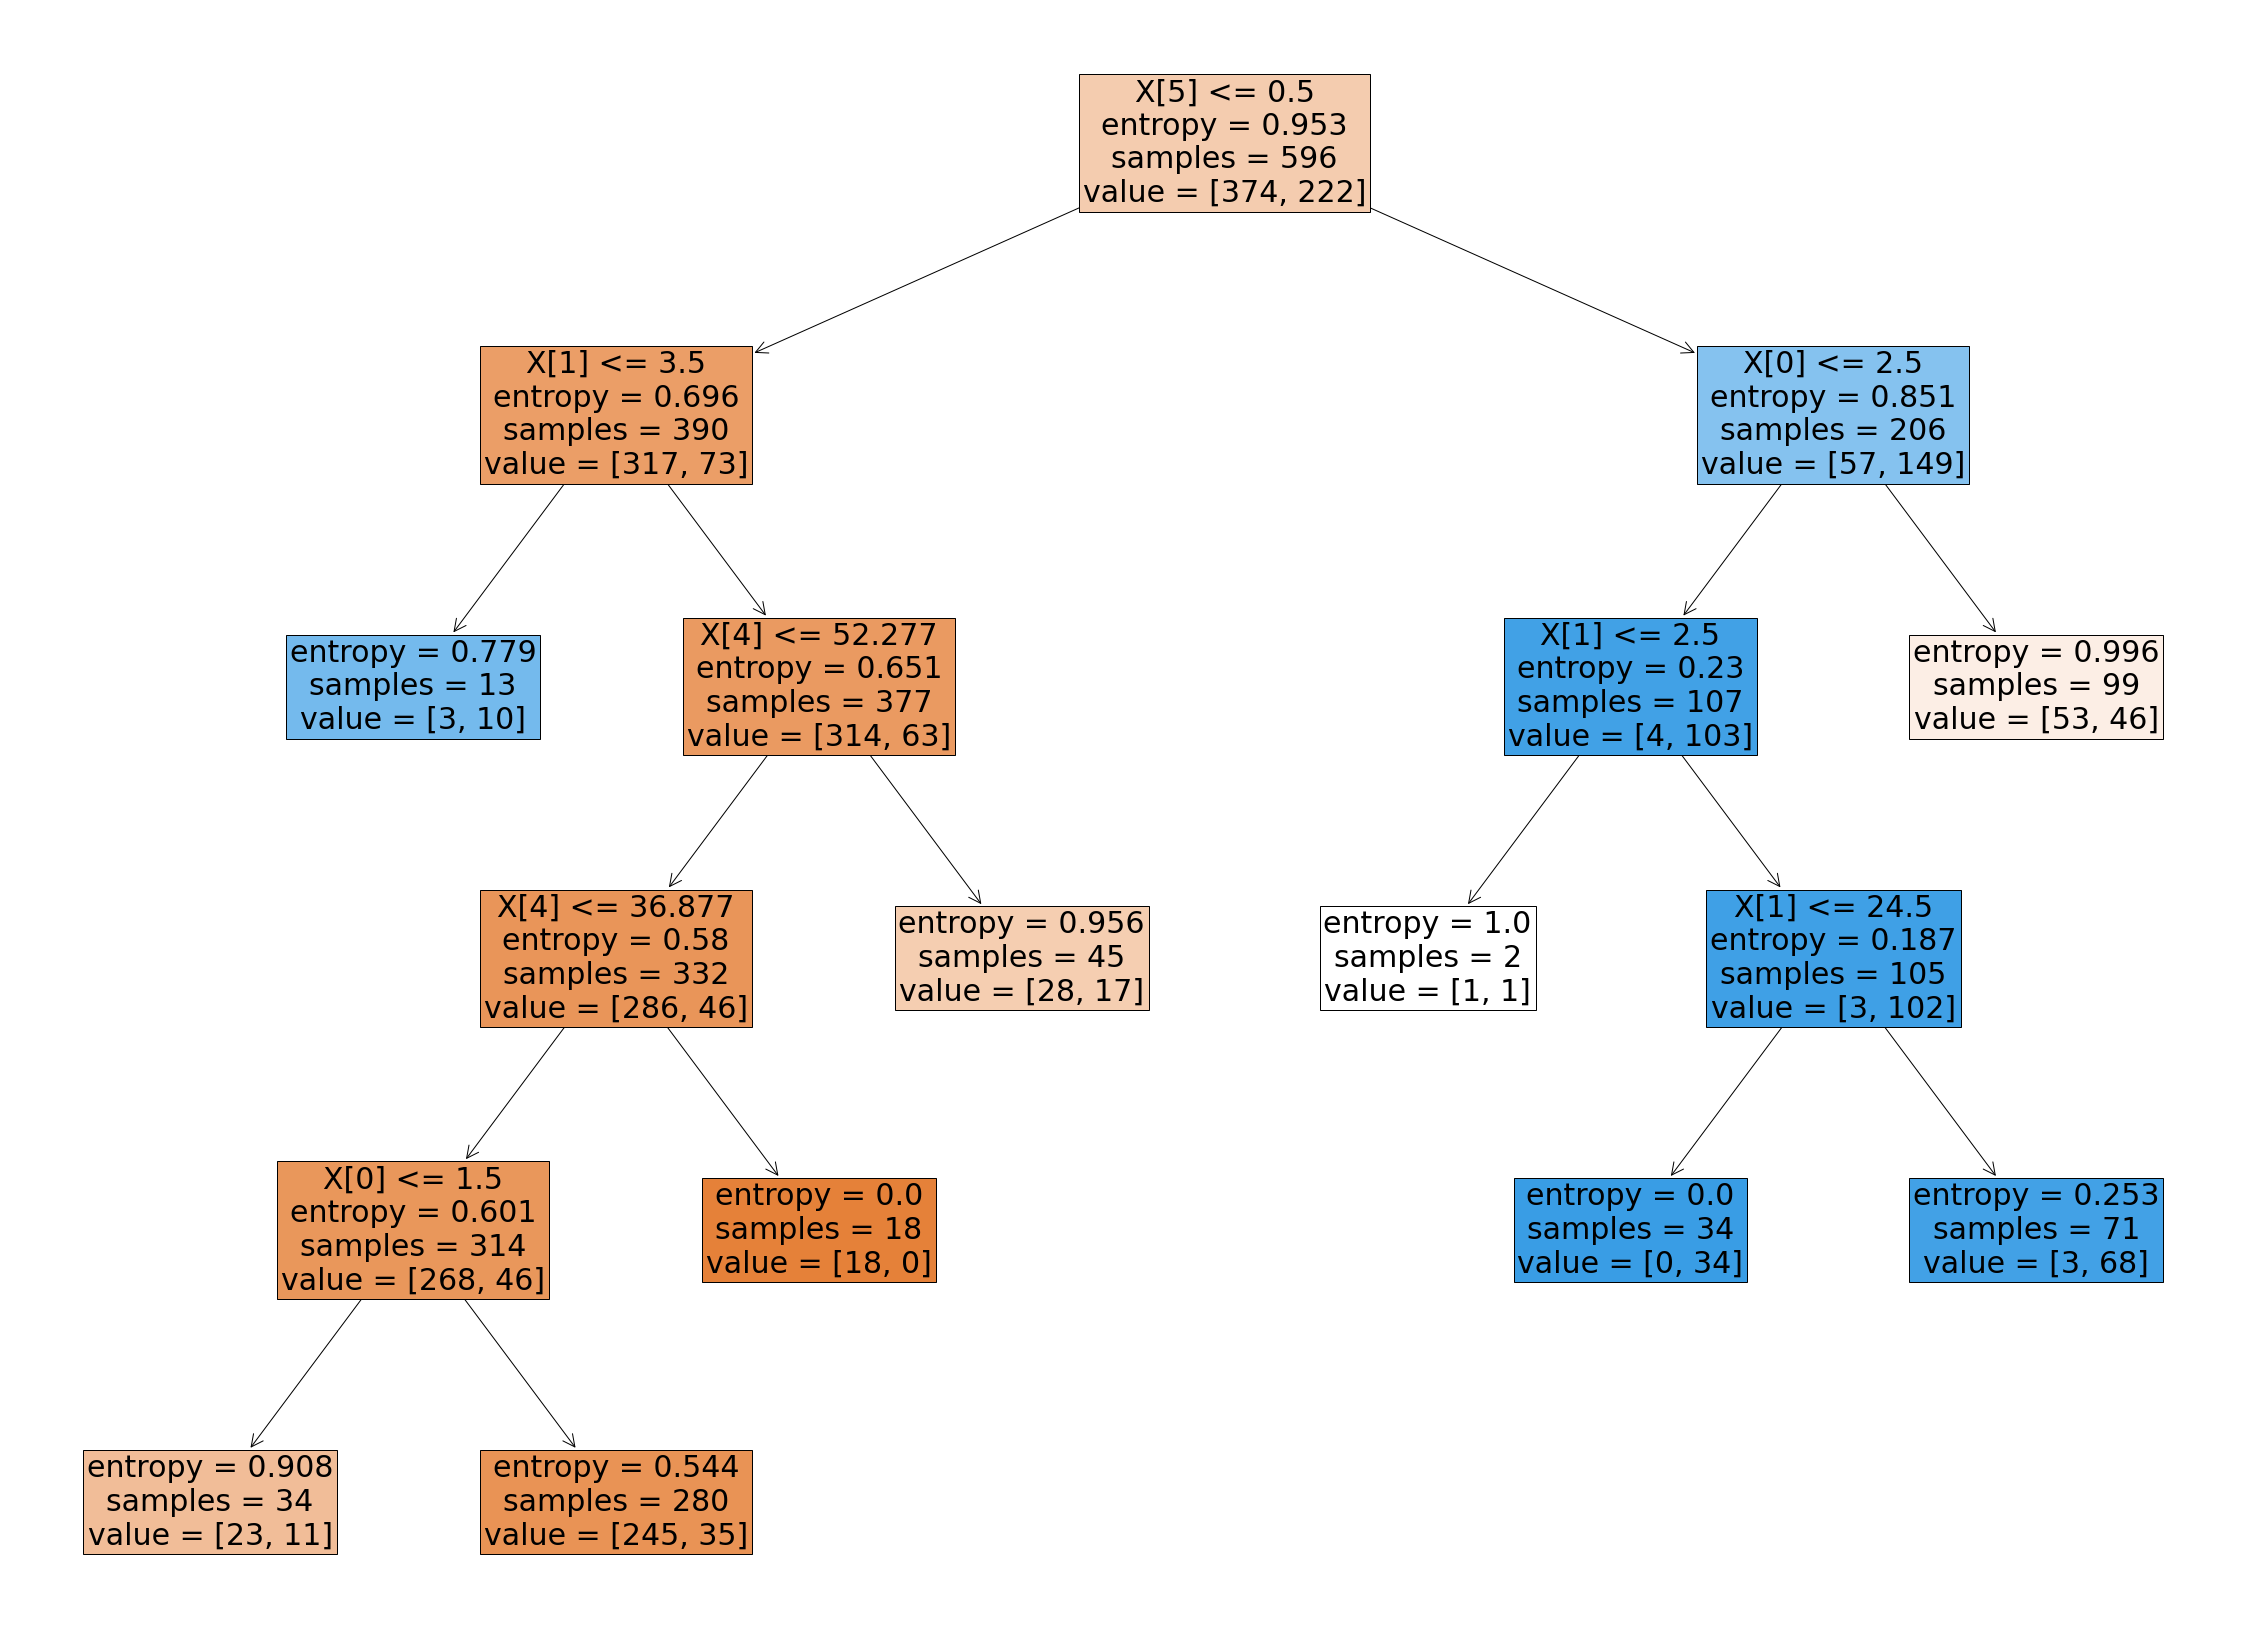

In [15]:
fig, ax = plt.subplots(figsize=(40, 30))
tree.plot_tree(clf, ax=ax, fontsize=30, filled=True)
plt.show()

In [16]:
clf.score(X_train, y_train)

0.80536912751677847

In [17]:
clf.score(X_test, y_test)

0.77627118644067794

In [18]:
max_depth_values = range(1, 100)

In [19]:
scores_data = pd.DataFrame()

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                               'train_score': [train_score], 
                               'test_score': [test_score],
                                'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [22]:
scores_data.head()

,cross_val_score,max_depth,test_score,train_score
0,0.781961,1,0.796610,0.781879
0,0.770196,2,0.776271,0.805369
0,0.790322,3,0.820339,0.823826
0,0.788627,4,0.823729,0.833893
0,0.802073,5,0.806780,0.840604


In [23]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [24]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


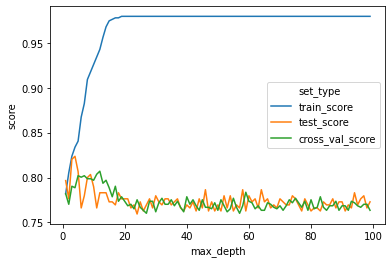

In [25]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [26]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.802073
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.802059
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.798683
207,10,cross_val_score,0.796989


In [27]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [28]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
best_clf.score(X_test, y_test)

0.80000000000000004

In [30]:
from sklearn.model_selection import GridSearchCV 

In [31]:
clf2 = tree.DecisionTreeClassifier()

In [32]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [33]:
grid_search_cv = GridSearchCV(clf2, parameters, cv=5)

In [34]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [35]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [36]:
best_clf2 = grid_search_cv.best_estimator_

In [37]:
best_clf2.score(X_test, y_test)

0.76949152542372878

In [38]:
y_pred = best_clf2.predict(X_test)

In [39]:
from sklearn.metrics import precision_score

In [40]:
precision_score(y_test, y_pred)

0.74528301886792447

In [41]:
from sklearn.metrics import recall_score

In [42]:
recall_score(y_test, y_pred)

0.65833333333333333

In [43]:
y_pred_probability = best_clf2.predict_proba(X_test)

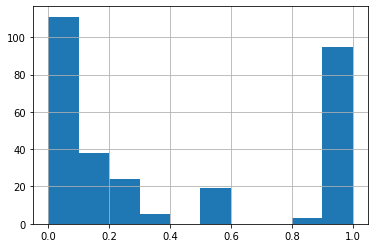

In [44]:
pd.Series(y_pred_probability[:, 1]).hist()

In [45]:
y_pred = np.where(y_pred_probability[:, 1] > 0.4, 1, 0)

In [46]:
precision_score(y_test, y_pred)

0.71794871794871795

In [47]:
recall_score(y_test, y_pred)

0.69999999999999996

In [48]:
pd.Series(y_pred_probability[:, 1]).unique()

array([ 0.57142857,  0.5       ,  0.13793103,  1.        ,  0.        ,
        0.85714286,  0.08333333,  0.27272727,  0.28571429,  0.03488372,
        0.22222222,  0.1627907 ,  0.33333333,  0.6       ])

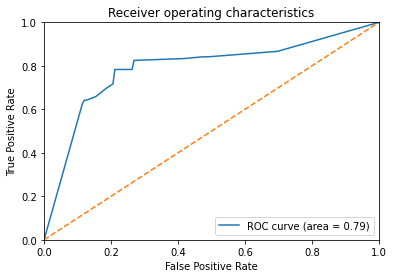

In [49]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf_rf = RandomForestClassifier()

In [52]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': range(1, 10)}

In [55]:
grid_search_cv_rf = GridSearchCV(clf_rf, parameters, cv=10)

In [56]:
grid_search_cv_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [58]:
best_clf_rf = grid_search_cv_rf.best_estimator_

In [59]:
best_clf_rf.score(X_test, y_test)

0.79322033898305089

In [61]:
feature_importances = best_clf_rf.feature_importances_

In [62]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})

In [63]:
feature_importances_df

,feature_importances,features
0,0.157894,Pclass
1,0.132564,Age
2,0.043454,SibSp
3,0.045369,Parch
4,0.126585,Fare
5,0.138112,Sex_female
6,0.304348,Sex_male
7,0.015959,Embarked_C
8,0.012487,Embarked_Q
9,0.023227,Embarked_S
